In [1]:
from animated_wms.tiles import TileStitcher

In [7]:
tile_stitcher = TileStitcher(20, -90, 45, -50, 5)
tilemap = tile_stitcher.get_tilemap('/tmp/tilemap.png', 'http://services.arcgisonline.com/ArcGIS/rest/services/Ocean_Basemap/MapServer/tile/{z}/{y}/{x}.jpg')

from PIL import Image
im = Image.open(tilemap)
im.size

/tmp/tile_cache/011_008.jpg
/tmp/tile_cache/014_011.jpg
/tmp/tile_cache/011_008.jpg
/tmp/tile_cache/011_009.jpg
/tmp/tile_cache/011_010.jpg
/tmp/tile_cache/011_011.jpg
/tmp/tile_cache/012_008.jpg
/tmp/tile_cache/012_009.jpg
/tmp/tile_cache/012_010.jpg
/tmp/tile_cache/012_011.jpg
/tmp/tile_cache/013_008.jpg
/tmp/tile_cache/013_009.jpg
/tmp/tile_cache/013_010.jpg
/tmp/tile_cache/013_011.jpg
/tmp/tile_cache/014_008.jpg
/tmp/tile_cache/014_009.jpg
/tmp/tile_cache/014_010.jpg
/tmp/tile_cache/014_011.jpg


(910, 684)

In [21]:
import numpy as np
image_files = list(glob('/tmp/tile_cache/*.jpg'))
grid =[]
for fn in image_files:
    y, x = coors_from_tile(fn)
    grid.append([y,x])
grid = np.array(grid)

y_range = np.min(grid[:,0]), np.max(grid[:,0])
x_range = np.min(grid[:,1]), np.max(grid[:,1])
    
y_len = ((y_range[1] - y_range[0])+1) * 256
x_len = ((x_range[1] - x_range[0])+1) * 256

blank_image = Image.new('RGB', (x_len, y_len))

for tile in image_files:
    s = re.match(r'.*([0-9]{2})_([0-9]{2})\.jpg', tile)
    y, x = s.groups()
    y = int(y)
    x = int(x)
    print s.groups()
    im = Image.open(tile)
    xcoord = (x-x_range[0]) * 256
    ycoord = (y-y_range[0]) * 256
    print xcoord
    print ycoord
    blank_image.paste(im, ((x - x_range[0]) * 256, (y - y_range[0]) * 256))
blank_image.save('/tmp/blah.jpg')


('11', '08')
0
0
('11', '09')
256
0
('11', '10')
512
0
('11', '11')
768
0
('11', '12')
1024
0
('12', '08')
0
256
('12', '09')
256
256
('12', '10')
512
256
('12', '11')
768
256
('12', '12')
1024
256
('13', '08')
0
512
('13', '09')
256
512
('13', '10')
512
512
('13', '11')
768
512
('13', '12')
1024
512


In [40]:
from PIL import Image, ImageDraw, ImageFont

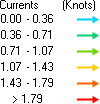

In [20]:
from IPython.display import Image as InlineImage
InlineImage(filename='/tmp/legend.png')

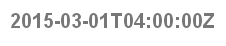

In [54]:
im = Image.new('RGBA', (400,400))
draw = ImageDraw.Draw(im)
draw.rectangle(((0,0), (225, 45)), fill=(255,255,255,100))

font = ImageFont.truetype('/Library/Fonts/Arial Bold.ttf', 20)
draw.text((10, 10), '2015-03-01T04:00:00Z', '#777', font=font)
cropped = im.crop(im.getbbox())
im.close()
cropped.save('/tmp/huh.png')
cropped.close()
InlineImage(filename='/tmp/huh.png')